## Created this project to calculate any ETF(IndexFund) returns for specific time period.  

* Using Yahoo finace for Downloading stock data.

In [43]:
#!pip install yfinance

* Importing all required libraries.

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

* Run the Returns function below to download, analyse, calculate and plot the graph.

In [55]:
class Returns:
    def __init__(self, symbol, analysis_start_date=None, analysis_end_date=None ):
        self.symbol = symbol
        self.analysis_start_date = analysis_start_date
        self.analysis_end_date = analysis_end_date
        self.download_data(self)
        self.calculate_returns()

    def download_data(self, symbol, analysis_start_date=None, analysis_end_date=None):
    # to download data
        self.stock_data = yf.download(self.symbol, start = self.analysis_start_date, end = self.analysis_end_date, interval = '1d').reset_index()

        # to calculate returns used log for additive returns 
        self.stock_data["Log_Returns"] = (np.log(self.stock_data['Close'] / self.stock_data['Close'].shift(1))) * 100

        # drop the NaN value
        self.stock_data = self.stock_data.dropna()

        return self.stock_data

    def calculate_returns(self):
        # extract last business day
        self.s = pd.date_range(self.analysis_start_date, self.analysis_end_date, freq='BM')
        
        # create column Date(last working date) in df
        self.df = pd.DataFrame(self.s, columns=["Date"])
        
        # compare above dataframe with exsting dataframe
        self.stock_data["Last_Date"] = self.stock_data["Date"].isin(self.df["Date"])
        
        # checking if last date is avilable in data frame
        self.stock_data = self.stock_data[self.stock_data["Last_Date"] == True]
        
        # calculating returns and used np.log to convert retruns to log as it is additive
        self.stock_data["Log_Returns"] = np.log(self.stock_data['Close'] / self.stock_data['Close'].shift(1))
        
        # droping NaN values as start data row will have now return
        self.stock_data.dropna(inplace=True)

        # to create column of cumulative returns
        self.stock_data["Cum Returns"] = np.exp(self.stock_data["Log_Returns"].cumsum())-1
        
        # set date as index
        self.stock_data.set_index("Date", inplace=True)
        
        # calcuate returns in percentage
        self.stock_data["Final Returns"] = self.stock_data["Cum Returns"] * 100
        # print returns
        print("Total returns: ", self.stock_data["Final Returns"].round(2)[-1])
        
        return self.stock_data
    
    def plot_graph(self):
        self.stock_data.plot(y="Final Returns", color='Green'),
        plt.xlabel("Year"),
        plt.ylabel("Returns [%]"),
        plt.title("Returns of " + self.symbol[:-3]);

* Run below cells to plot various 'Returns' charts of specified time period.

[*********************100%***********************]  1 of 1 completed
Total returns:  254.72


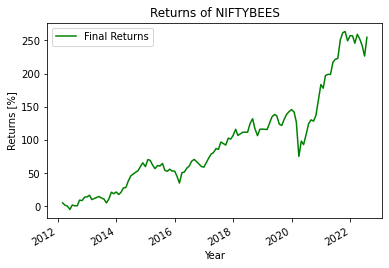

In [56]:
returns = Returns("NIFTYBEES.NS", "2012-01-01", "2022-09-07")
returns.plot_graph()

[*********************100%***********************]  1 of 1 completed
Total returns:  279.33


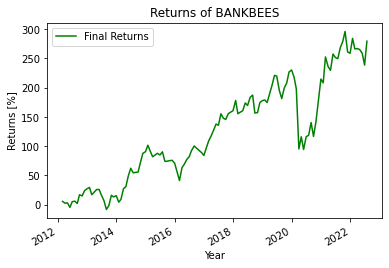

In [57]:
returns = Returns("BANKBEES.NS", "2012-01-01", "2022-09-07")
returns.plot_graph()

[*********************100%***********************]  1 of 1 completed
Total returns:  338.19


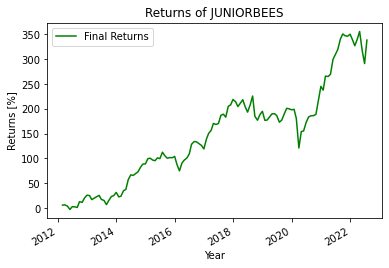

In [58]:
returns = Returns("JUNIORBEES.NS", "2012-01-01", "2022-09-07")
returns.plot_graph()